In [93]:
# import libraries

import pandas as pd
!pip install seaborn 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics
from termcolor import colored as cl

# read in data

df = pd.read_csv(r"/Users/derp/Downloads/movies.csv",encoding='latin1')
print(df.head())

You should consider upgrading via the '/Users/derp/jupyter/bin/python -m pip install --upgrade pip' command.
       budget                                 company country        director  \
0   8000000.0           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000.0                      Paramount Pictures     USA     John Hughes   
2  15000000.0                      Paramount Pictures     USA      Tony Scott   
3  18500000.0  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000.0                    Walt Disney Pictures     USA  Randal Kleiser   

       genre        gross                      name rating    released  \
0  Adventure   52287414.0               Stand by Me      R  1986-08-22   
1     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11   
2     Action  179800601.0                   Top Gun     PG  1986-05-16   
3     Action   85160248.0                    Aliens      R  1986-07-18   
4  Adventure   18564613.0   Flight

In [94]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [38]:
# loop through each column to search for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [10]:
# Data types for columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [95]:
# change data type of columns

df['budget'] = df['budget'].astype('int64') 

df['gross'] = df['gross'].astype('int64') 



In [57]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000.0,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000.0,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000.0,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000.0,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012


In [96]:
# create correct year column

df['yearcorrect'] = df['released'].astype(str).str[0:4]

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [6]:
# order by gross revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [7]:
# show all data

pd.set_option('display.max_rows', None)

In [97]:
#drop duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

5288                                          micro_scope
3486                                             i5 Films
6084                                                 erbp
3225                                       double A Films
2707                          Zucker Brothers Productions
1495                                   Zeta Entertainment
5905                                 Zentropa Productions
5917                        Zentropa International Norway
2742                              Zentropa Entertainments
329                                  Zenith Entertainment
4710                                      Zazen Produções
542                              Zanuck/Brown Productions
698                                   Zanuck Company, The
499                           Zacharias-Buhai Productions
4687                           Young Hannibal Productions
5084                                          Yellow Bird
4118                                       Yash Raj Films
4578          

In [98]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [38]:
# predictions - Budget high correlation
# predictions - company high correlation



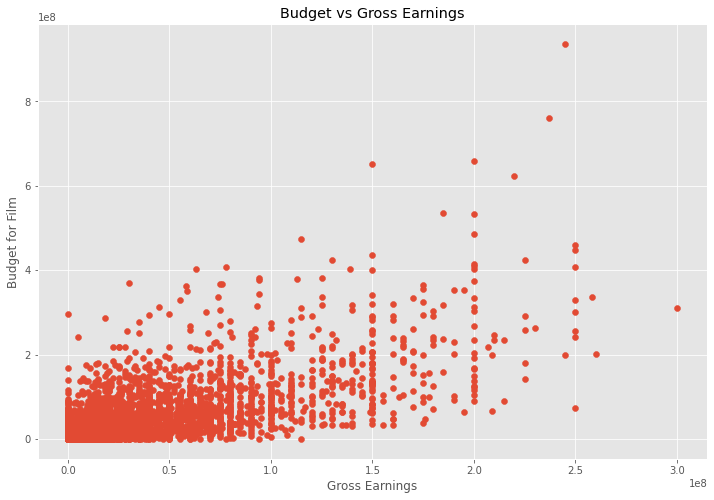

In [42]:
# scatter plot of budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [43]:
## Linear Regression

In [99]:
X = df['budget'].values.reshape(-1,1)
y = df['gross'].values.reshape(-1,1)

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [102]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[5578848.49960527]
[[1.15722939]]


In [103]:
y_pred = regressor.predict(X_test)

In [104]:
df_linreg = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_linreg

,Actual,Predicted
0,7310000,5.578848e+06
1,117559438,4.029573e+07
2,4635344,1.136500e+07
3,4847865,1.252222e+07
4,17957265,2.409452e+07
5,41909762,4.608188e+07
6,67878,2.409452e+07
7,93436322,2.254524e+08
8,3802390,5.868156e+06
9,5002310,2.062283e+07


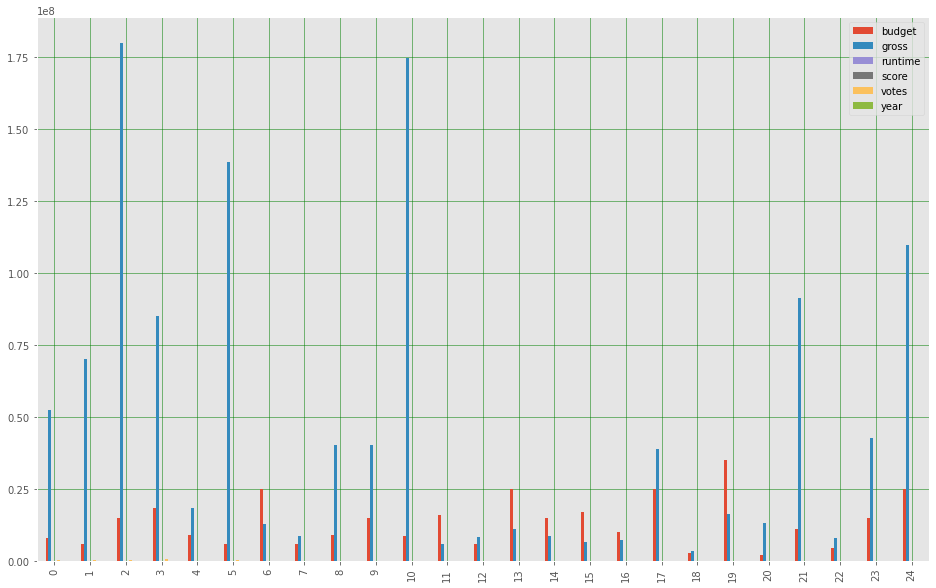

In [105]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

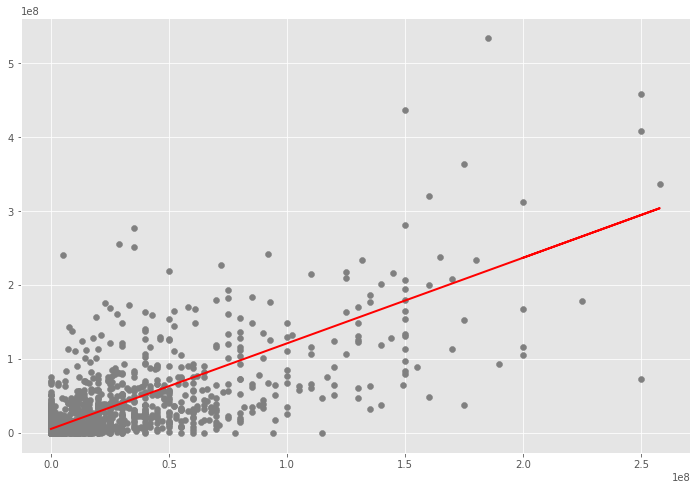

In [106]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [107]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 22807707.972832315
Mean Squared Error: 1470439041647126.2
Root Mean Squared Error: 38346304.145864256


<AxesSubplot:xlabel='budget', ylabel='gross'>

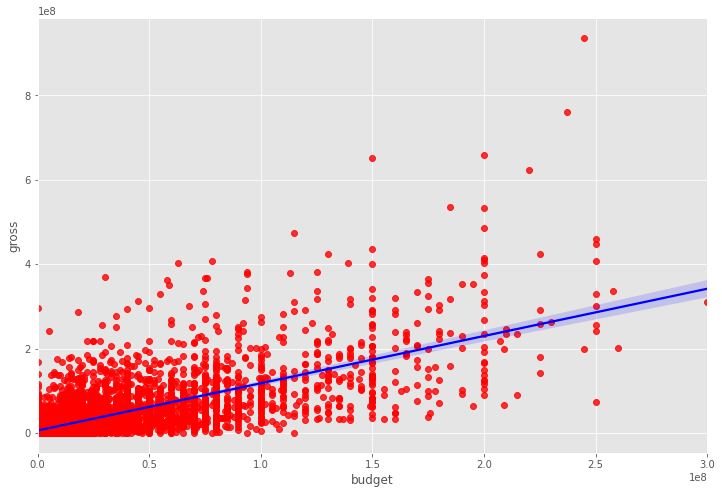

In [41]:
# plot budget vs gross with seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [108]:
# see a positive correlation, calculate how much?
# different methods = pearson, kendall, spearman

df.corr(method='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.492432,0.126282,-0.053693,0.411074,0.148940
gross,0.492432,1.000000,0.114660,0.003313,0.479754,0.064873
runtime,0.126282,0.114660,1.000000,0.245634,0.193118,0.039448
score,-0.053693,0.003313,0.245634,1.000000,0.268525,0.036190
votes,0.411074,0.479754,0.193118,0.268525,1.000000,0.302008
year,0.148940,0.064873,0.039448,0.036190,0.302008,1.000000


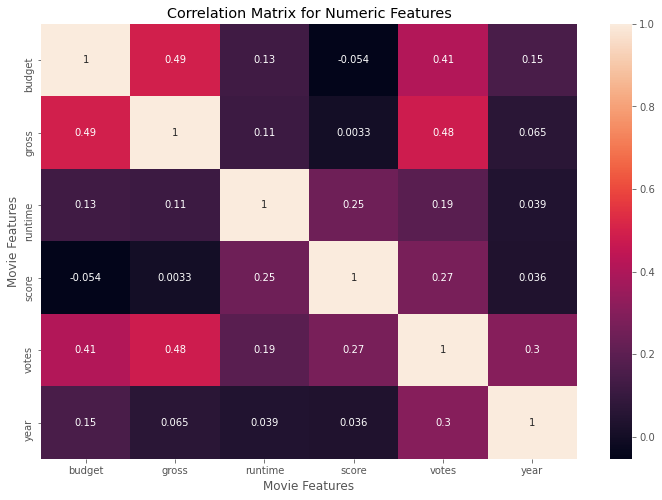

In [109]:
# high correlation between budget and gross 
# visualize correlation matrix

correlation_matrix = df.corr(method='kendall')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [110]:
# find correlation with non-numeric features - start with Company
# assign an ID key to each str feature

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


In [111]:
# Multiple Linear Regression

In [112]:
X = df_numerized[['budget', 'company', 'director', 'genre', 'votes', 'star', 'writer']].values
y = df_numerized['gross'].values

<AxesSubplot:xlabel='gross', ylabel='Count'>

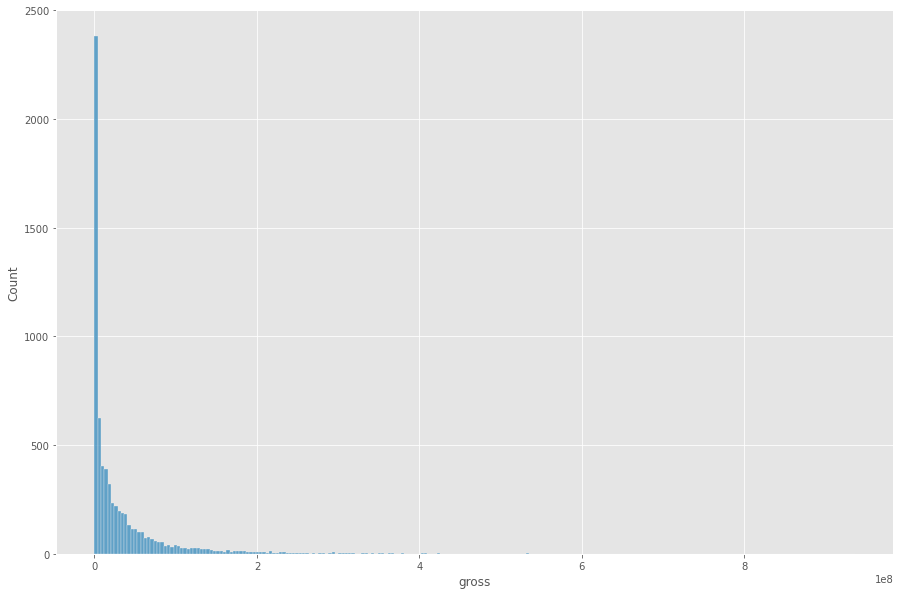

In [113]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.histplot(df_numerized['gross'])

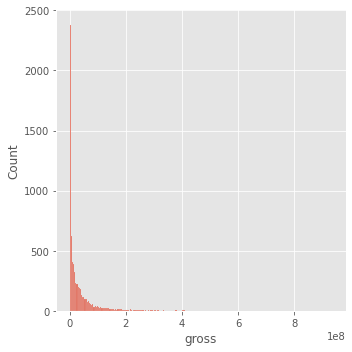

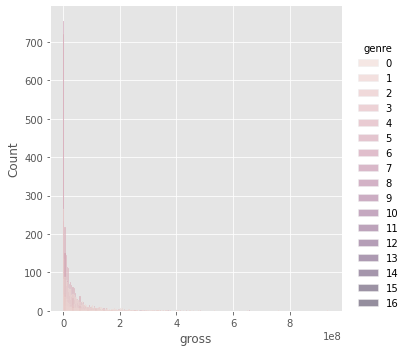

In [117]:

sns.displot(df['gross'])
sns.displot(df, x="gross", color="green", hue="genre")
plt.show()

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [119]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [120]:
regressor.coef_

array([ 8.21730433e-01,  3.70484110e+03, -1.50698525e+03, -2.19856619e+05,
        1.74432832e+02,  1.77343339e+03, -7.76486706e+01])

In [121]:
y_pred = regressor.predict(X_test)

In [122]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)

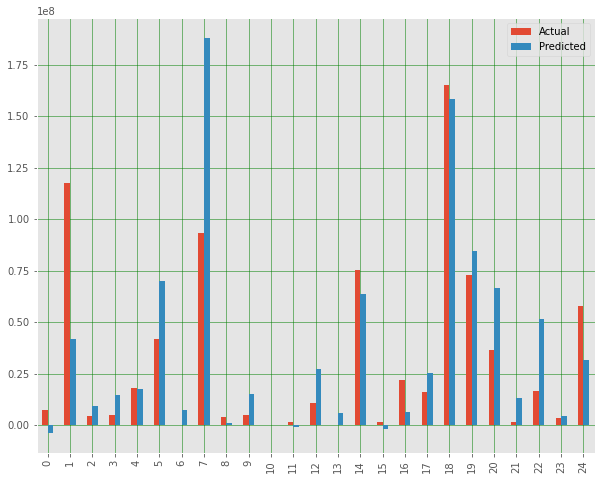

In [123]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [124]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19408546.20797379
Mean Squared Error: 1024018256205017.0
Root Mean Squared Error: 32000285.251932006


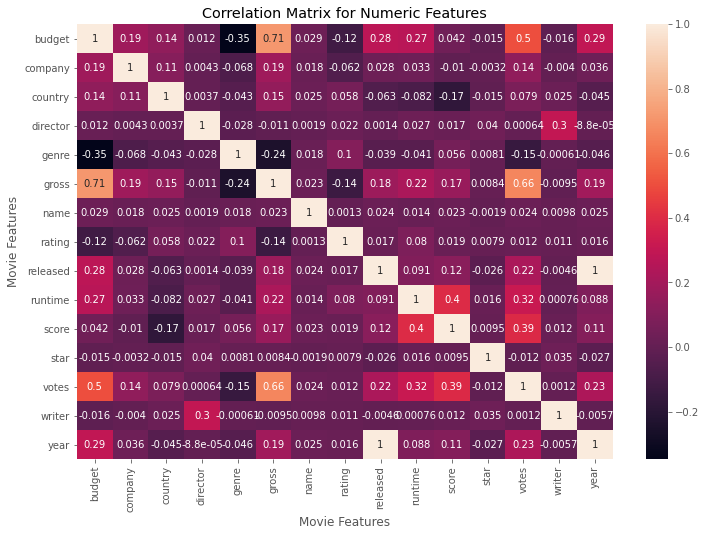

In [52]:
# run same correlation with new data frame

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [89]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.291009
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.045204
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000088
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008382,0.662457,-0.009455,0.191548
name,0.028712,0.018098,0.025020,0.001905,0.018062,0.022768,1.000000,0.001288,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001288,1.000000,0.016696,0.079542,0.019271,0.007893,0.011678,0.010740,0.016221
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025504,0.221736,-0.004635,0.996187
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639


In [54]:
# organize to see the highest correlations, quickly: unstacking

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget    budget      1.000000
          company     0.187205
          country     0.137635
          director    0.011602
          genre      -0.346794
          gross       0.712196
          name        0.028712
          rating     -0.119660
          released    0.276635
          runtime     0.268226
          score       0.042145
          star       -0.015061
          votes       0.503924
          writer     -0.015611
          year        0.291009
company   budget      0.187205
          company     1.000000
          country     0.107950
          director    0.004320
          genre      -0.068330
          gross       0.187220
          name        0.018098
          rating     -0.062250
          released    0.027898
          runtime     0.033058
          score      -0.010426
          star       -0.003160
          votes       0.138662
          writer     -0.004032
          year        0.036272
country   budget      0.137635
          company     0.107950
        

In [55]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.346794
genre     budget     -0.346794
          gross      -0.242676
gross     genre      -0.242676
country   score      -0.174414
score     country    -0.174414
votes     genre      -0.150519
genre     votes      -0.150519
rating    gross      -0.135538
gross     rating     -0.135538
rating    budget     -0.119660
budget    rating     -0.119660
runtime   country    -0.081796
country   runtime    -0.081796
genre     company    -0.068330
company   genre      -0.068330
country   released   -0.062609
released  country    -0.062609
company   rating     -0.062250
rating    company    -0.062250
genre     year       -0.046259
year      genre      -0.046259
country   year       -0.045204
year      country    -0.045204
country   genre      -0.042793
genre     country    -0.042793
runtime   genre      -0.041357
genre     runtime    -0.041357
          released   -0.039179
released  genre      -0.039179
director  genre      -0.027668
genre     director   -0.027668
year    

In [56]:
# sorting HIGH correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     budget      0.503924
budget    votes       0.503924
votes     gross       0.662457
gross     votes       0.662457
budget    gross       0.712196
gross     budget      0.712196
released  year        0.996187
year      released    0.996187
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64

In [29]:
# therefore: VOTES and BUDGET have the HIGHEST correlation to gross earnings 
# also: COMPANY has a LOWER correlation than expected, however "SCORE" is even lower
# And: COMPANY still has separate entities that belong to the same parent company
# also: "star", "director", and "score" have lower correlations to gross than COMPANY does

